In [1]:
import pandas as pd
# import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter (action = 'ignore')
# plt.style.use ('seaborn')
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv ("predict.csv")
data

,Hydrogen,Oxigen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,H2O,Date
0,30,413,39,140,2690,17,48,0,7,1/1/2023
1,7,376,13,205,1780,4,15,0,4,1/2/2023
2,7,12300,0,302,3640,3,0,1,36,1/3/2023
3,11,1780,2,29,867,0,54,0,27,1/4/2023
4,0,9444,3,358,5507,6,0,0,75,1/5/2023
...,...,...,...,...,...,...,...,...,...,...
465,0,22000,0,122,856,8,0,0,7,4/10/2024
466,29,277,3,95,607,0,89,0,14,4/11/2024
467,6,5790,5,705,2250,0,0,0,9,4/12/2024
468,0,448,2,24,482,0,99,0,12,4/13/2024


In [3]:
df = pd.DataFrame (data)
df

,Hydrogen,Oxigen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,H2O,Date
0,30,413,39,140,2690,17,48,0,7,1/1/2023
1,7,376,13,205,1780,4,15,0,4,1/2/2023
2,7,12300,0,302,3640,3,0,1,36,1/3/2023
3,11,1780,2,29,867,0,54,0,27,1/4/2023
4,0,9444,3,358,5507,6,0,0,75,1/5/2023
...,...,...,...,...,...,...,...,...,...,...
465,0,22000,0,122,856,8,0,0,7,4/10/2024
466,29,277,3,95,607,0,89,0,14,4/11/2024
467,6,5790,5,705,2250,0,0,0,9,4/12/2024
468,0,448,2,24,482,0,99,0,12,4/13/2024


In [4]:
df.shape

(470, 10)

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hydrogen    470 non-null    int64 
 1   Oxigen      470 non-null    int64 
 2   Methane     470 non-null    int64 
 3   CO          470 non-null    int64 
 4   CO2         470 non-null    int64 
 5   Ethylene    470 non-null    int64 
 6   Ethane      470 non-null    int64 
 7   Acethylene  470 non-null    int64 
 8   H2O         470 non-null    int64 
 9   Date        470 non-null    object
dtypes: int64(9), object(1)
memory usage: 36.8+ KB


In [6]:
df.describe()

,Hydrogen,Oxigen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,H2O
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,16.282979
std,2002.142678,14164.233283,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,17.115646
min,0.000000,57.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,496.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,5.000000
50%,9.000000,3810.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,12.000000
75%,34.000000,14875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,21.000000
max,23349.000000,249900.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,183.000000


In [7]:
def check(df):
    List=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        List.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(List)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,Hydrogen,int64,111,0
1,Oxigen,int64,382,0
2,Methane,int64,74,0
3,CO,int64,298,0
4,CO2,int64,374,0
5,Ethylene,int64,61,0
6,Ethane,int64,141,0
7,Acethylene,int64,26,0
8,H2O,int64,63,0
9,Date,object,470,0


In [8]:
df.isna().sum()

Hydrogen      0
Oxigen        0
Methane       0
CO            0
CO2           0
Ethylene      0
Ethane        0
Acethylene    0
H2O           0
Date          0
dtype: int64

In [9]:
df.dropna (how = 'any')

,Hydrogen,Oxigen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,H2O,Date
0,30,413,39,140,2690,17,48,0,7,1/1/2023
1,7,376,13,205,1780,4,15,0,4,1/2/2023
2,7,12300,0,302,3640,3,0,1,36,1/3/2023
3,11,1780,2,29,867,0,54,0,27,1/4/2023
4,0,9444,3,358,5507,6,0,0,75,1/5/2023
...,...,...,...,...,...,...,...,...,...,...
465,0,22000,0,122,856,8,0,0,7,4/10/2024
466,29,277,3,95,607,0,89,0,14,4/11/2024
467,6,5790,5,705,2250,0,0,0,9,4/12/2024
468,0,448,2,24,482,0,99,0,12,4/13/2024


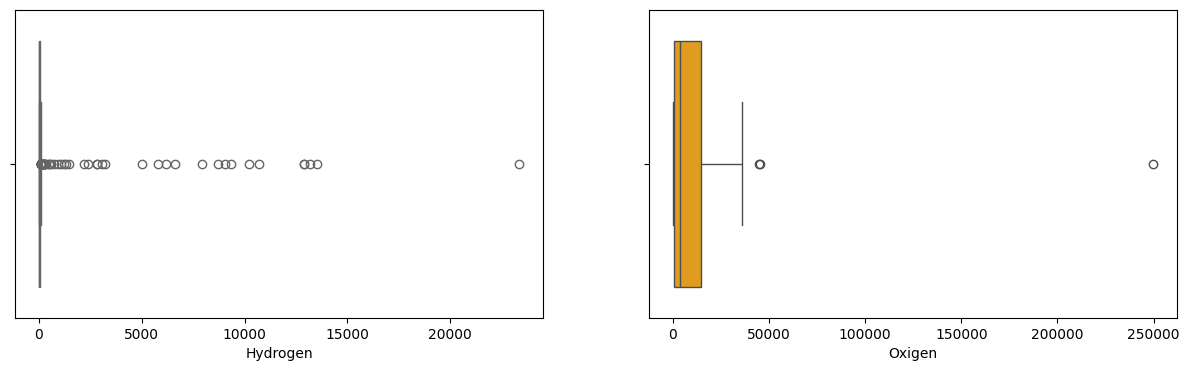

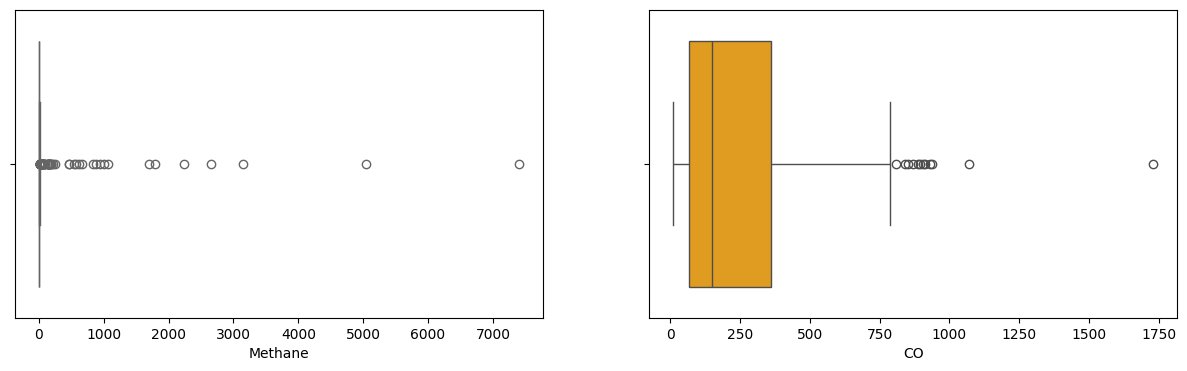

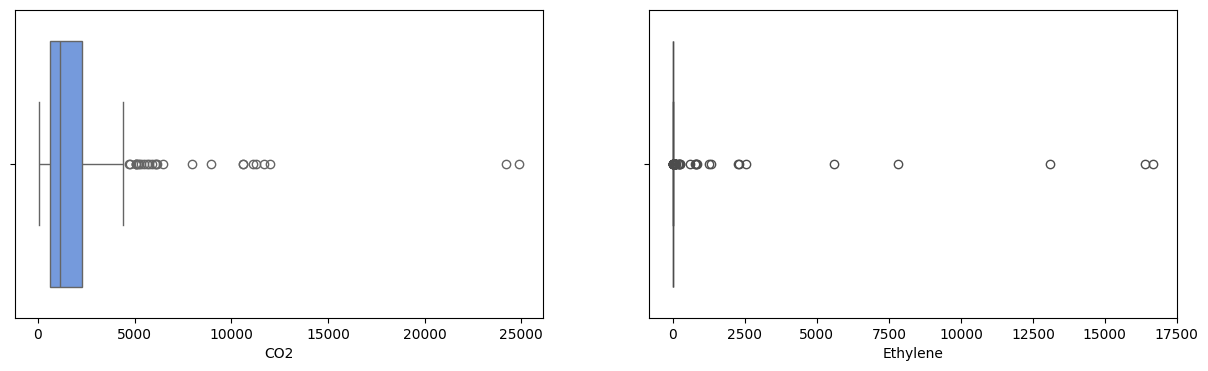

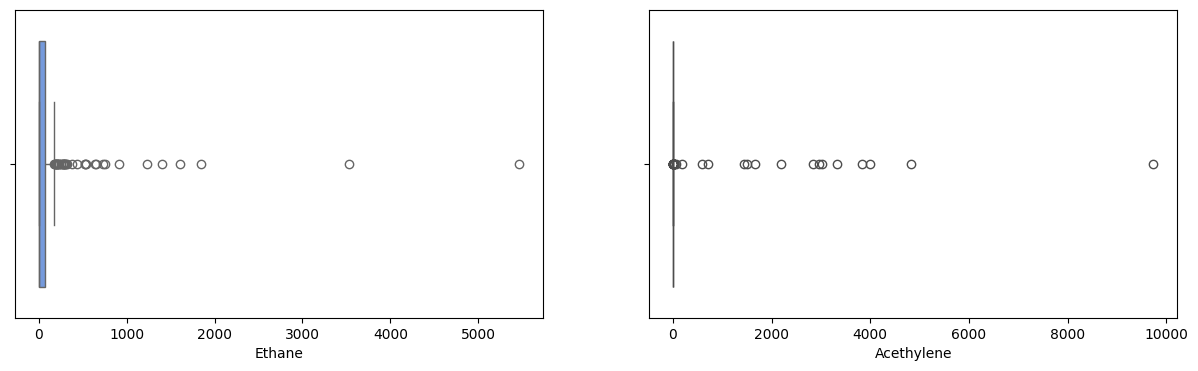

In [10]:
numerical = ['Hydrogen' , 'Oxigen' , 'Methane' , 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene']
i = 0


while i < len(numerical):
    fig = plt.figure(figsize=[15, 4])
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first location
    sns.boxplot(x=numerical[i], data=df, color='cornflowerblue')
    i += 1  # next step
    if i == len(numerical):
        break
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numerical[i], data=df, color='orange')
    i += 1
    plt.show()

Hydrogen> 15000

Oxigen>40000

Methane>2000

CO>1000

CO2>15000

Ethylene>7500

Ethane>3000

Acethylene>6000

H2O>100

Health_index>80 là nhiễu

In [11]:
thresholds = {
    'Hydrogen': 15000,
    'Oxigen': 40000,
    'Methane': 2000,
    'CO': 1000,
    'CO2': 15000,
    'Ethylene': 7500,
    'Ethane': 3000,
    'Acethylene': 6000,
    'H2O': 100
}

# Xử lý nhiễu: thay thế giá trị lớn hơn ngưỡng bằng giá trị trung bình
for column, threshold in thresholds.items():
    median_value = df[df[column] <= threshold][column].median()  # Tính trung vị từ các giá trị hợp lệ
    df.loc[df[column] > threshold, column] = median_value       # Thay thế giá trị nhiễu bằng trung vị


In [12]:
DF = df.copy()

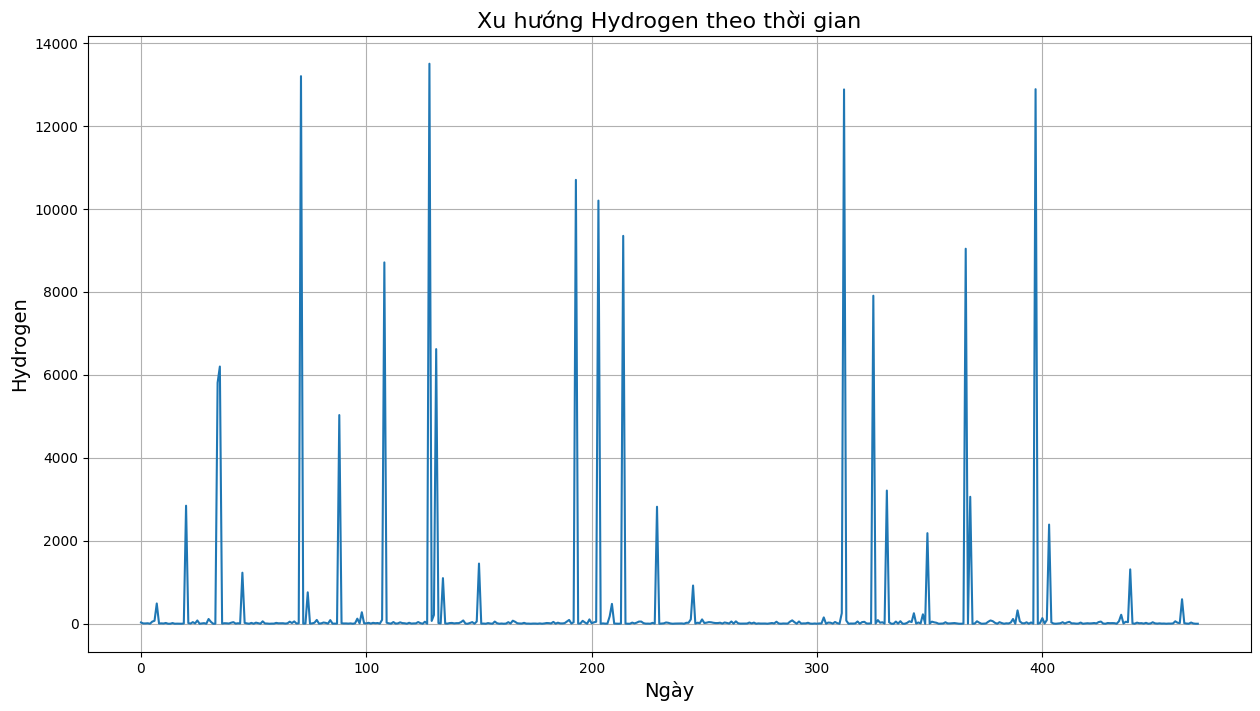

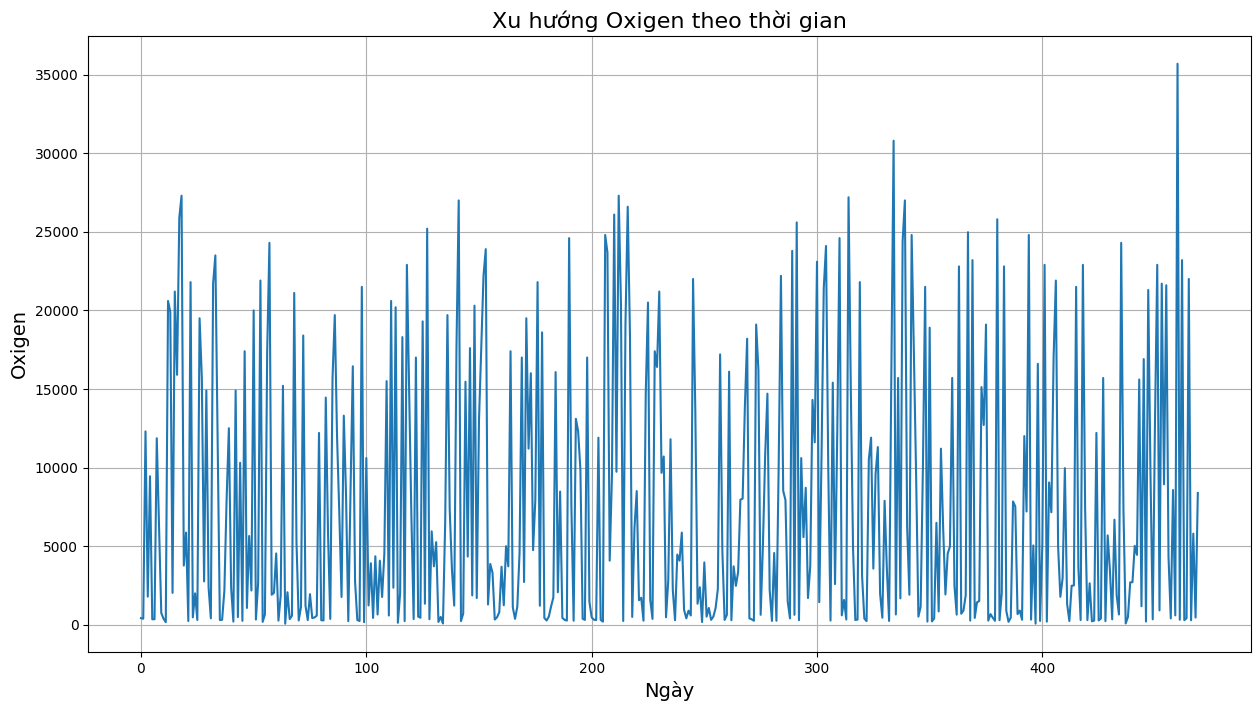

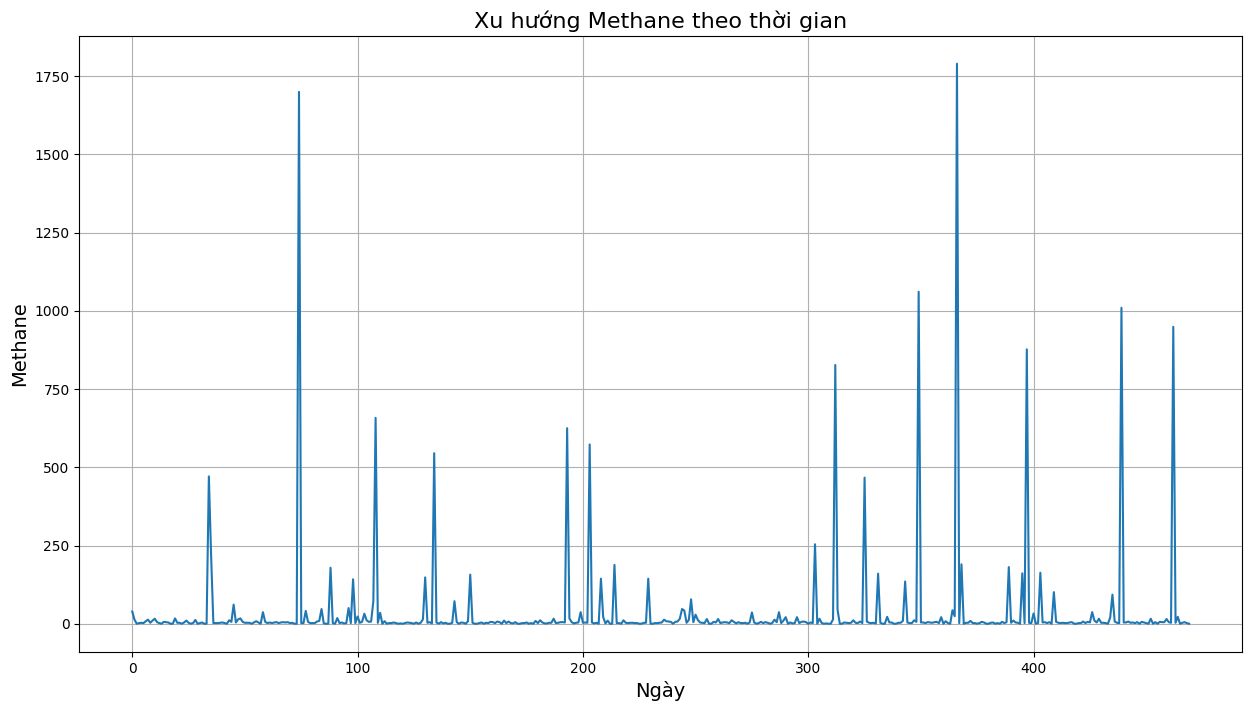

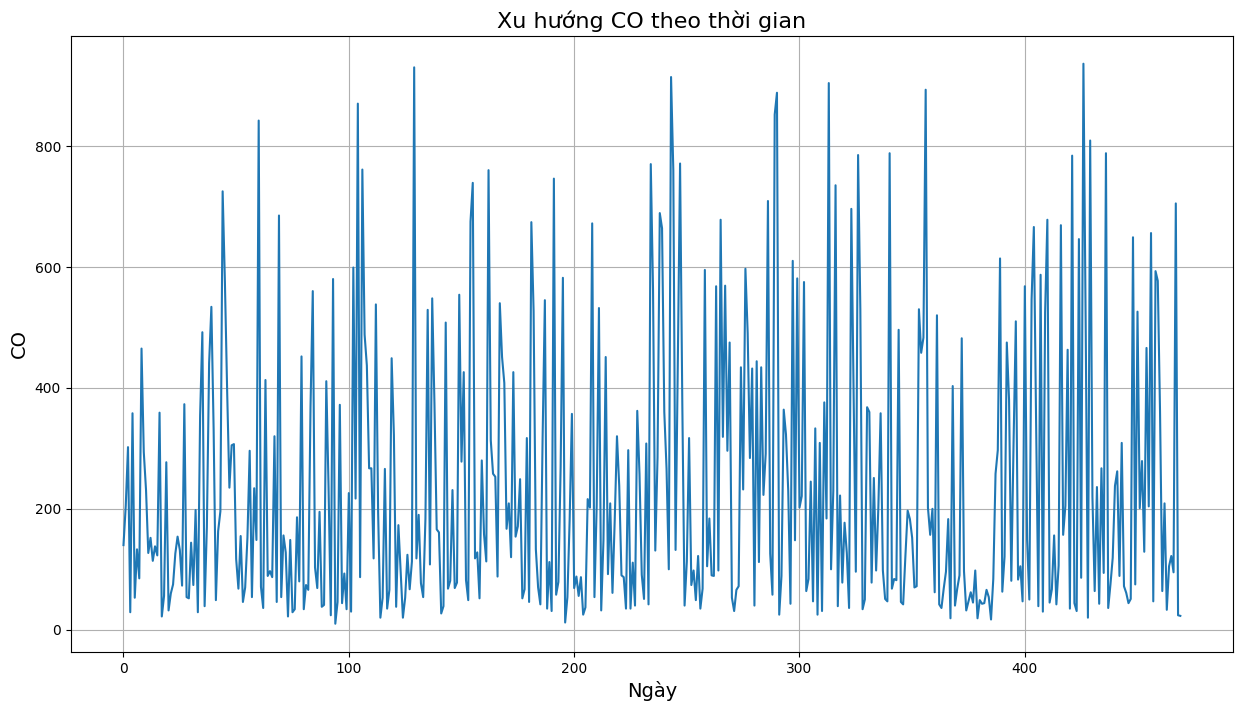

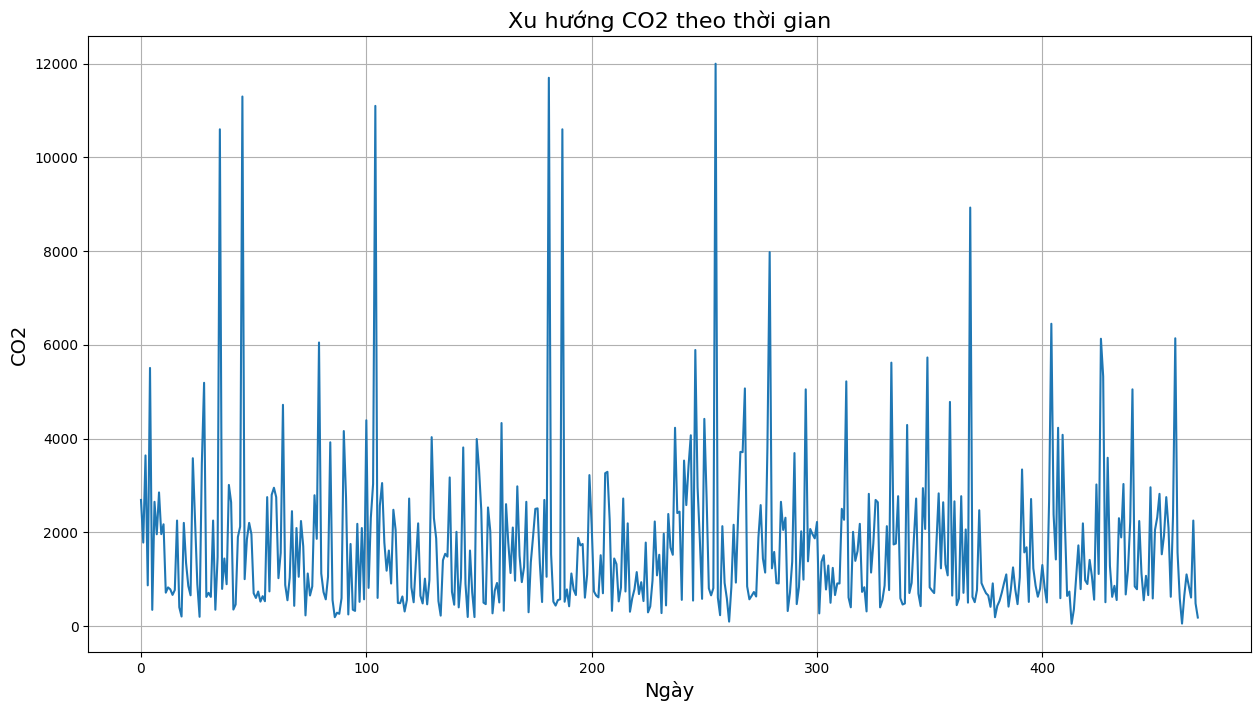

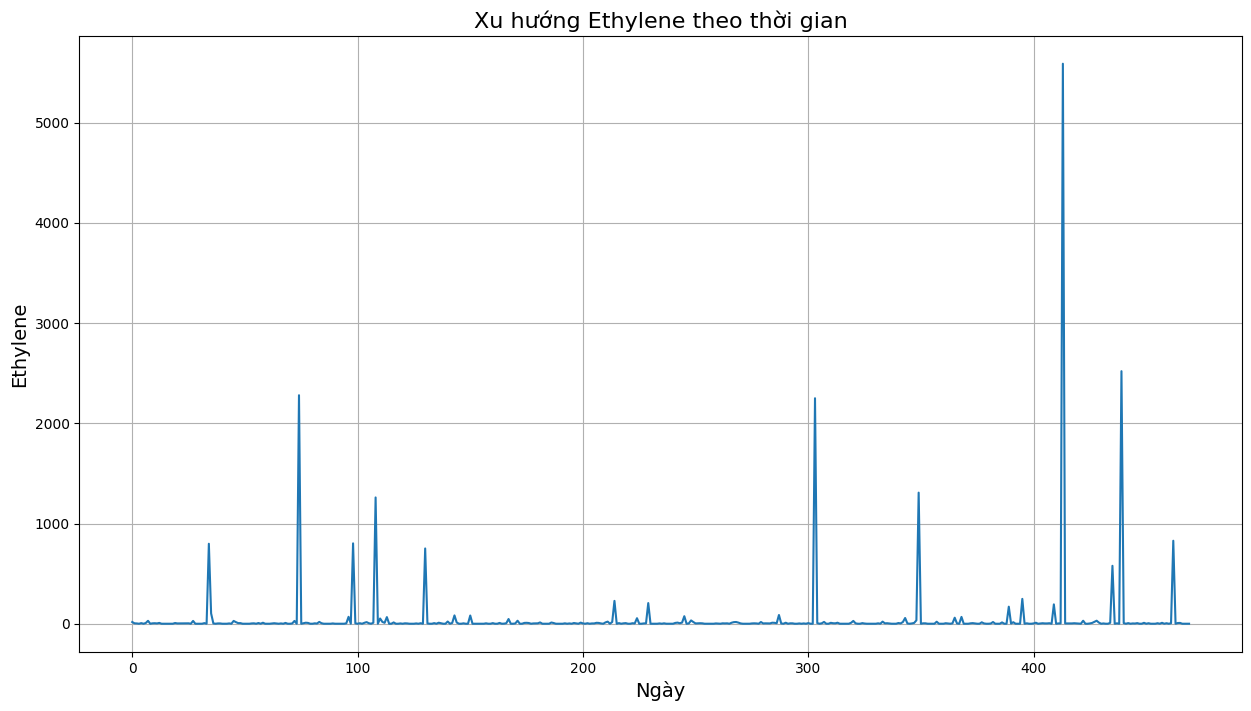

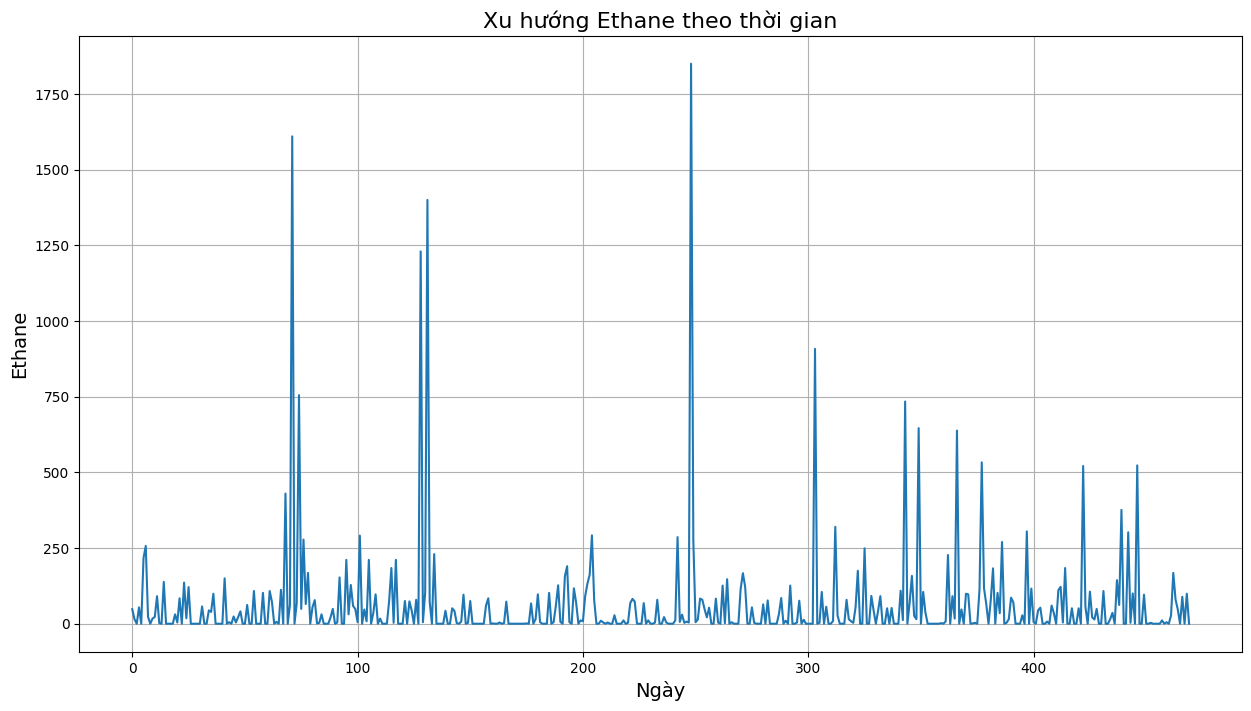

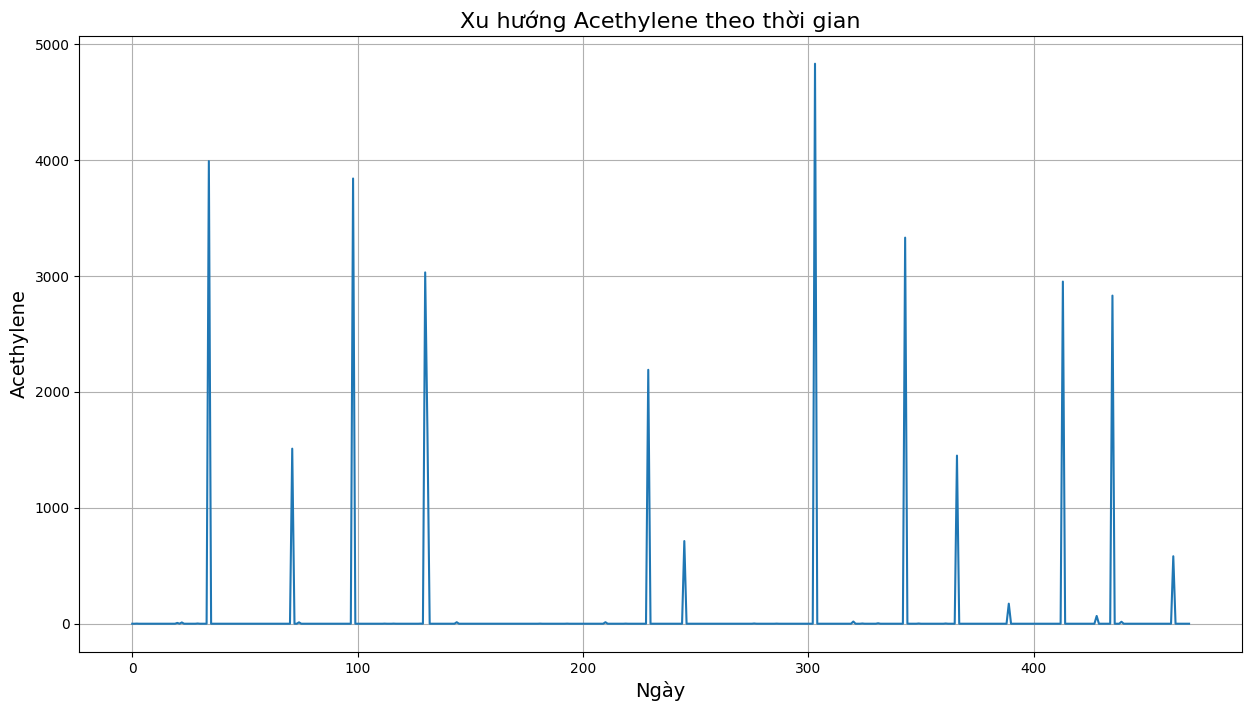

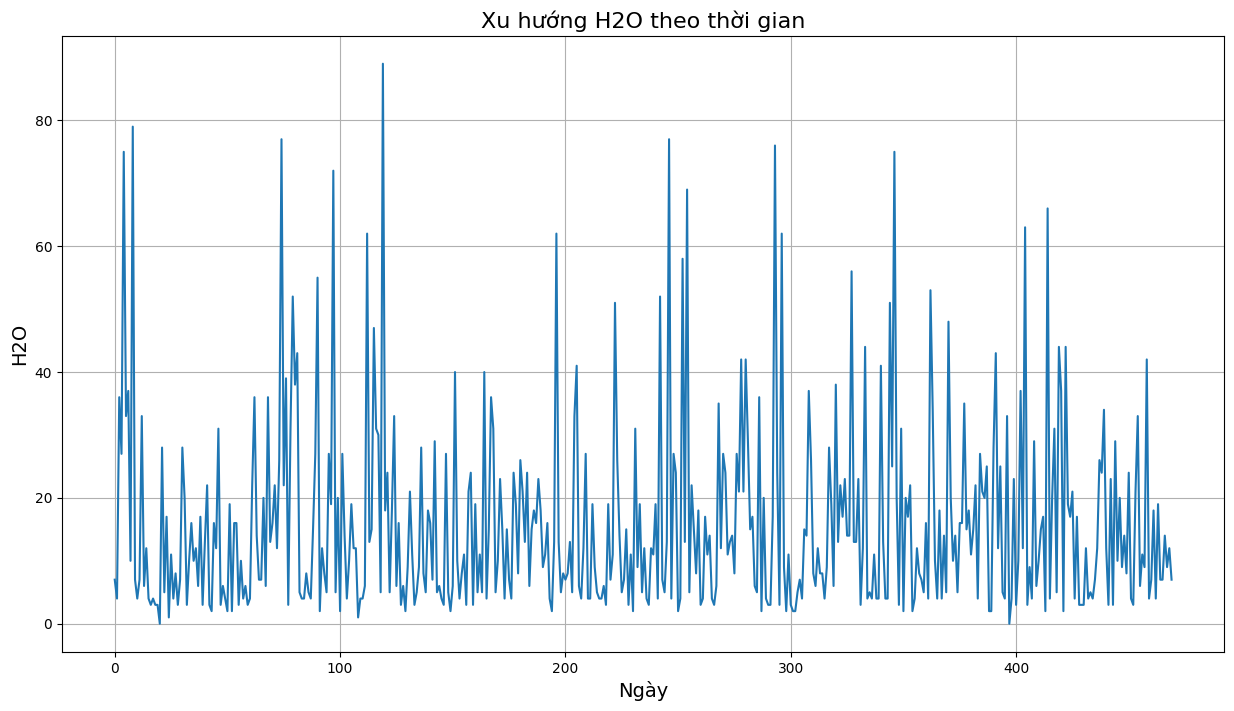

In [16]:
# Plot each index in separate subplots
columns_to_plot = [col for col in df.columns if col != "Date"]
n_cols = len(columns_to_plot)

for i, column in enumerate(columns_to_plot, 1):
    plt.figure(figsize=(15, 8))
    plt.plot(df.index, df[column])
    plt.title(f"Xu hướng {column} theo thời gian", fontsize=16)
    plt.xlabel("Ngày", fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.grid()
    plt.show()

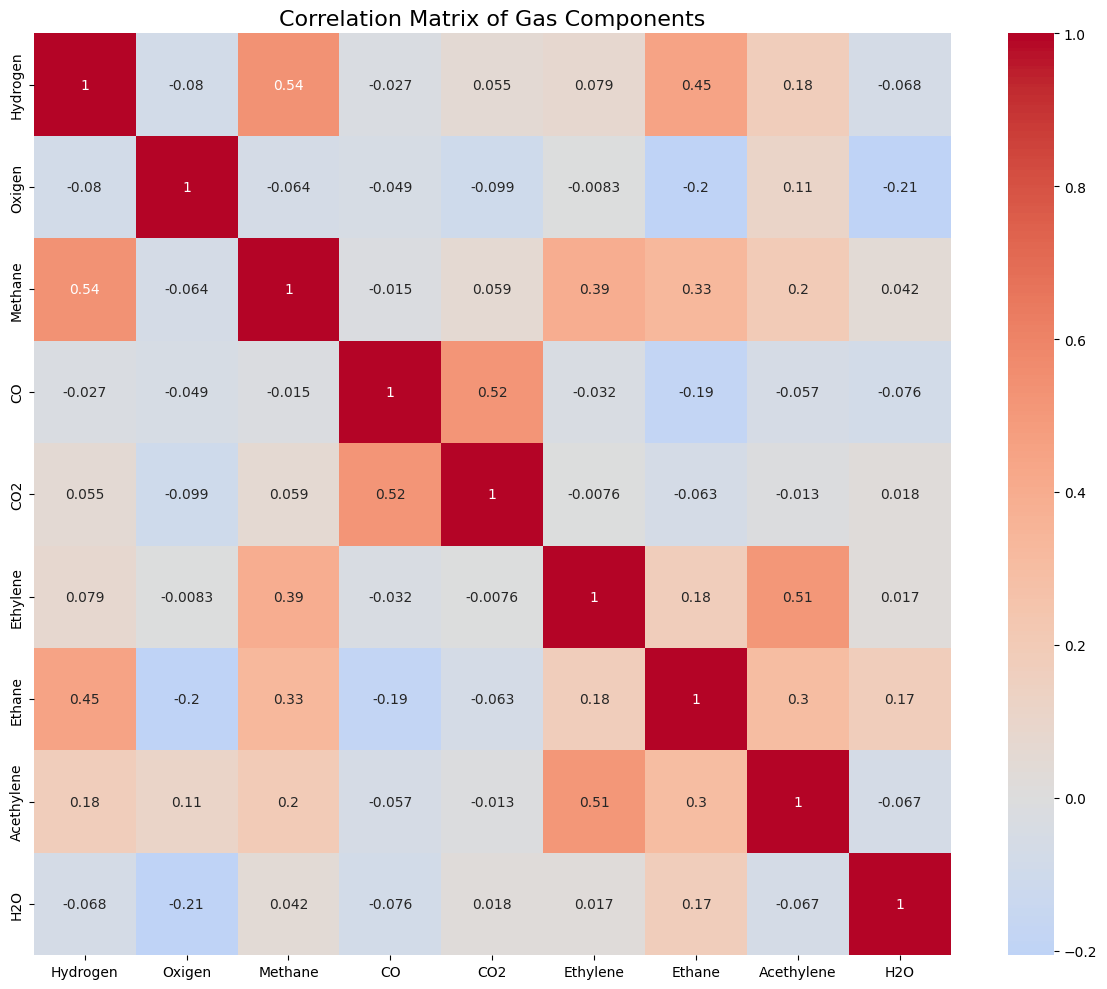

In [17]:
# Calculate correlation matrix
correlation_matrix = df.drop('Date', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Gas Components', fontsize=16)
plt.tight_layout()
plt.show()



In [18]:
import torch
from torch import nn

# Định nghĩa Transformer
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, model_dim, nhead, num_layers, seq_length):
        super(TimeSeriesTransformer, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(
            d_model=model_dim, nhead=nhead
        )
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(seq_length * model_dim, input_dim * 5)  # Dự đoán 5 ngày

    def forward(self, x):
        x = self.transformer(x)
        x = x.flatten(1)  # Gộp chiều thời gian
        x = self.fc(x)
        return x

# Thông số
input_dim = 9  # Số chỉ số (Hydrogen, Oxigen,...)
model_dim = 64
nhead = 4
num_layers = 3
seq_length = 30

model = TimeSeriesTransformer(input_dim, model_dim, nhead, num_layers, seq_length)


In [19]:
# 1. Data Preparation
def create_sequences(df, seq_ength, prediction_days=5):
   # Remove 'Date' column and convert to numpy array
   data = df.drop('Date', axis=1).values
   X, y = [], []
   
   for i in range(len(data) - seq_length - prediction_days + 1):
       # Input sequence
       sequence = data[i:(i + seq_length)]
       # Target: next 5 days for all features
       target = data[(i + seq_length):(i + seq_length + prediction_days)].flatten()
       X.append(sequence)
       y.append(target)
   
   return torch.FloatTensor(X), torch.FloatTensor(y)

In [20]:
# 2. Prepare data
eq_length = 30
, y = create_sequences(df, seq_length)

('y', '=', 'create_sequences(df,', 'seq_length)')